In [2]:
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 KB 247.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 332.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 133.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.0/311.0 KB 455.0 kB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import itertools


In [3]:
with open("portfolio-graph.pkl", "rb") as f:
  wow_graph = pickle.load(f)

In [4]:
def get_bbl_subgraph(g, bbl):
    for c in nx.connected_components(g):
        induced_subgraph = g.subgraph(c)
        for node in induced_subgraph.nodes(data=True):
            if bbl in node[1]["bbls"]:
                return induced_subgraph
            
def get_edge_colors(graph, highlight_edges=False):
  edges = nx.get_edge_attributes(graph, "type").items()
  mapping = {'bizaddr': 'blue', 'name': 'red'}
  def get_edge_color(edge):
    if highlight_edges:
      # order of nodes in edge tuple can differ
      highlight_edges_sets = [set(x) for x in highlight_edges]
      if set(edge[0]) in highlight_edges_sets:
        return 'black'
    return mapping[edge[1]]
  return [get_edge_color(edge) for edge in edges]
    
def draw_graph(g, bbl=False, highlight_edges=False, with_labels=False):
  min_size = 10
  if bbl:
    node_sizes = [len(n[1]['bbls']) + min_size for n in g.nodes(data=True)]
  else:
    node_sizes = min_size
  kwargs = {
      'node_size':  node_sizes,
      'edge_color': get_edge_colors(g, highlight_edges),
      'alpha': 0.6,
      'node_color': ['gold' if bbl in n[1]['bbls'] else 'black' for n in g.nodes(data=True)],
      # 'cmap': plt.cm.winter_r
    }
  nx.draw_networkx(g, with_labels=with_labels, **kwargs)
  plt.axis("off")
  plt.show()

def draw_wow_graph_for_bbl(wow_graph, bbl, with_labels=False):
  print(f"BBL: {bbl}")
  g = get_bbl_subgraph(wow_graph, bbl)
  nested_bbls = [n[1]["bbls"] for n in g.nodes(data=True)]
  bbls = list(itertools.chain.from_iterable(nested_bbls))
  print("bbls: ", len(set(bbls)))
  print("dup bbls: ", len(bbls) - len(set(bbls)))
  draw_graph(g, bbl, with_labels)

In [ ]:
# g = get_bbl_subgraph(wow_graph_old, '2042900008')
# nested_bbls = [n[1]["bbls"] for n in g.nodes(data=True)]
# bbls_old = list(itertools.chain.from_iterable(nested_bbls))

# g = get_bbl_subgraph(wow_graph_new, '2042900008')
# nested_bbls = [n[1]["bbls"] for n in g.nodes(data=True)]
# bbls_new = list(itertools.chain.from_iterable(nested_bbls))

# print("new not in old")
# print([x for x in set(bbls_new) if x not in set(bbls_old)])
# print("old not in new")
# print([x for x in set(bbls_old) if x not in set(bbls_new)])

BBL: 1001420025
bbls:  172
dup bbls:  0


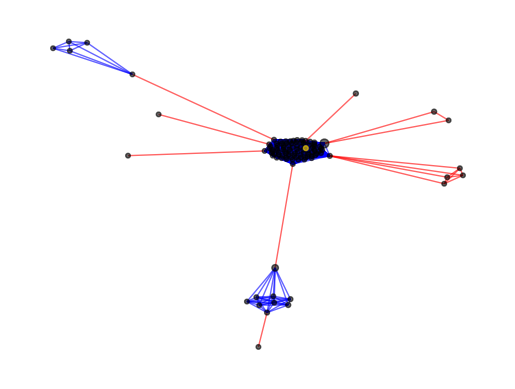

BBL: 2042900008
bbls:  76
dup bbls:  0


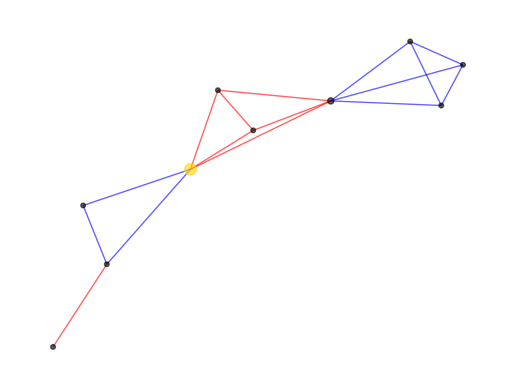

BBL: 3019250007
bbls:  151
dup bbls:  0


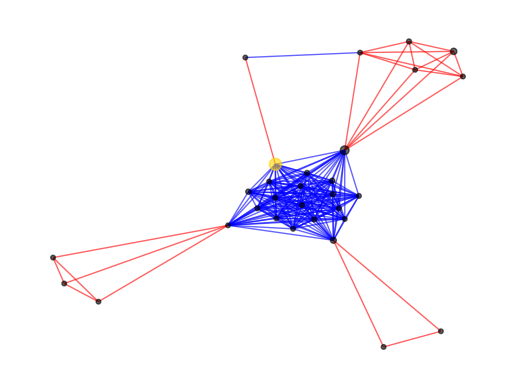

BBL: 4015640058
bbls:  174
dup bbls:  0


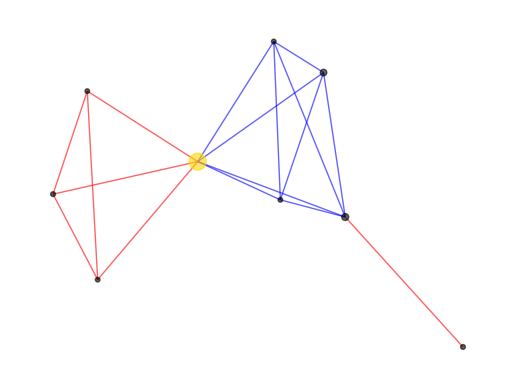

BBL: 1004120042
bbls:  235
dup bbls:  0


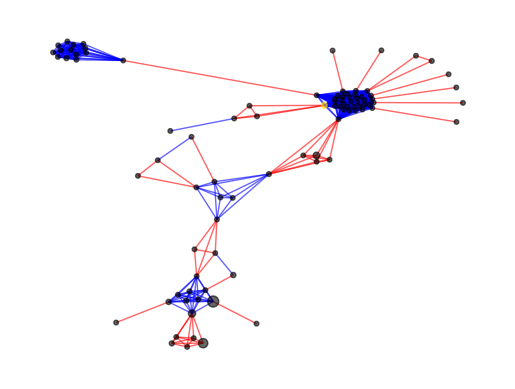

BBL: 4015640058
bbls:  174
dup bbls:  0


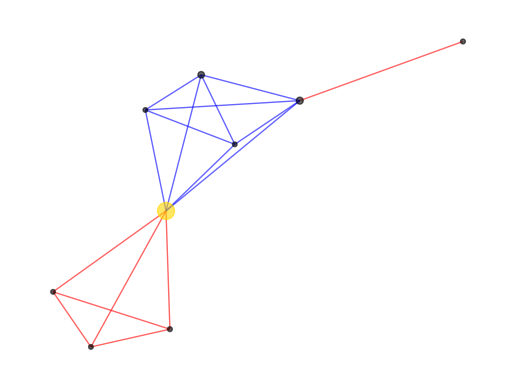

In [42]:
draw_wow_graph_for_bbl(wow_graph, '1001420025')
draw_wow_graph_for_bbl(wow_graph, '3019250007')
draw_wow_graph_for_bbl(wow_graph, '1004120042')
"3009747501" # New Bedford Management (subset of the big one, in first splitting sttempt still incorrectly linked with other clusters because of common names ("david choen", "thamoas lee", "maria fernandez", "saul friedman"))
draw_wow_graph_for_bbl(wow_graph, '2042900008') # Steller mgmt
draw_wow_graph_for_bbl(wow_graph, '4015640058') # A&E
draw_wow_graph_for_bbl(wow_graph, '2023710029') # Wavecrest mgmt
draw_wow_graph_for_bbl(wow_graph, '1005000005') # FirstService Residential mgmt
draw_wow_graph_for_bbl(wow_graph, '1012197501') # AKAM mgmt
draw_wow_graph_for_bbl(wow_graph, '1008770022') # DOUGLAS ELLIMAN mgmt
# draw_wow_graph_for_bbl(wow_graph, '3013420039') # The big one!

In [ ]:
subgraph = get_bbl_subgraph(wow_graph, "1004120042")
cutedges = list(nx.minimum_edge_cut(subgraph))
print(f"Need to cut the these {len(cutedges)} edges to split the porfolio.\n{cutedges}")
draw_graph(subgraph, "1001420025", highlight_edges=cutedges)

In [ ]:
subgraph = get_bbl_subgraph(wow_graph, "1004120042")

edges_bc = nx.edge_betweenness_centrality(subgraph)
max_edges = [x[0] for x in edges_bc.items() if x[1] == max(edges_bc.values())]
draw_graph(subgraph, highlight_edges=max_edges)

We need to decide when to attempt splitting a portfolio (including recusive). The first criteria should probably just be the size by number of properties, since that's very quick to calculate and we can have a pretty good idea of what the upper bound of reasonable size is via research. However, below that threshold we need another method to know if we suspect a grouping to be one larger portfolio or multiple smaller ones. 

There are various algorithms to calculate different statistics that may be useful here - like connectivity, clustering, etc. These seem to take a long time to run, which to some extent may be ok since we only have to recreate the portfolios once a month. However, there are also a set of [approximations](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.connectivity.node_connectivity.html) that are way faster and might work well enough for this our purpose.

One that seems promising is [`average_clustering`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.clustering_coefficient.average_clustering.html), which estimates an approximated average clustering coefficient for a graph. 

Clustering algorithms to identify communities.
https://memgraph.com/blog/graph-clustering-algorithms-usage-comparison

[`louvain_communities`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html) and [`greedy_modularity_communities`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html)

These both optiize for "modularity", using different approaches. Modularity of a network partition is high when there are dense connections between the nodes within communities but sparse connections between nodes in different communities. You can also adjust the `resolution` parameter to favor larger or smaller communities.

`greedy_modularity_communities` finds communities of nodes by starting with each node as its own community then joining communities if doing so increases the modularity of the network. 

`louvain_communities` ...


Examples:

`2042900008` - Settler Management (bbls=77) (one of our WOW example portfolios). Both algorithms (`greedy_modularity_communities (resolution=0.9)`, and `louvain_communities (resolution=1)`) don't split this any further.

`4015640058` - A&E Real Estate (bbls=173) (our other example portfolio). 

`3034150028` - PRASHANTH RAYAPUDI (bbls=332) very tightly connected portfolio - just this one person, with a couple business addresses and name mispellings. `louvain_communities (resolution=0.1)` correctly doesn't split it any further.



BBL: 1004120042
Original Portfolio


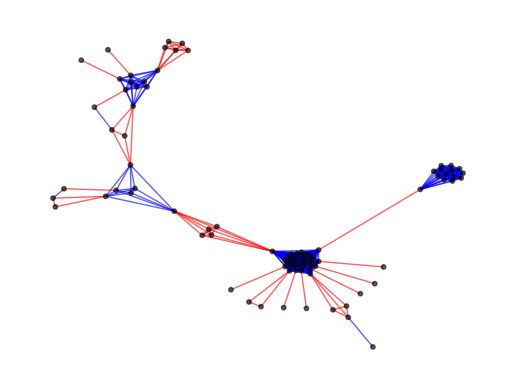

Communities (4) (resolution=0.9)
approximation.average_clustering: 0.829


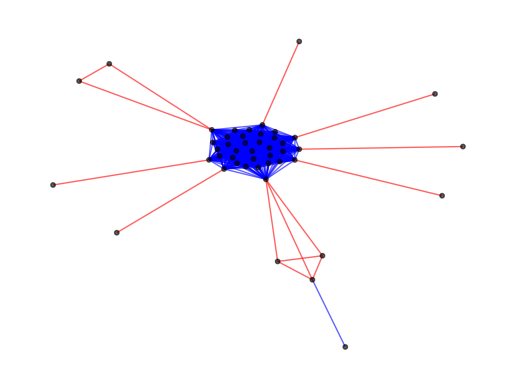

approximation.average_clustering: 0.705


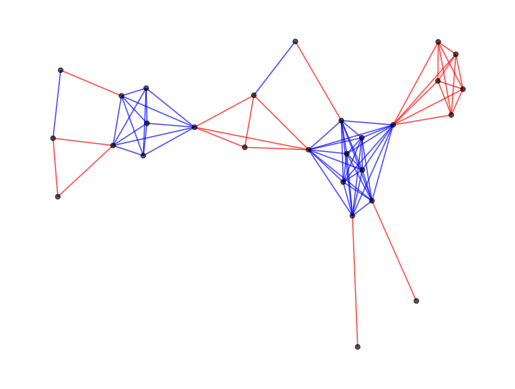

approximation.average_clustering: 1.0


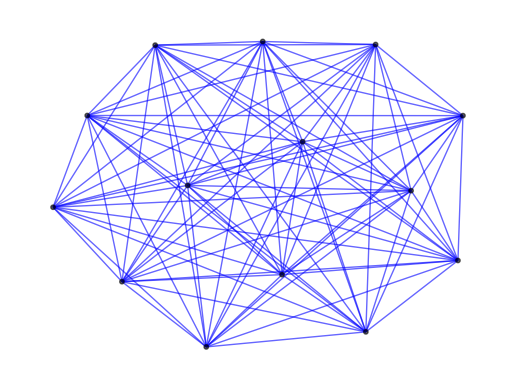

approximation.average_clustering: 1.0


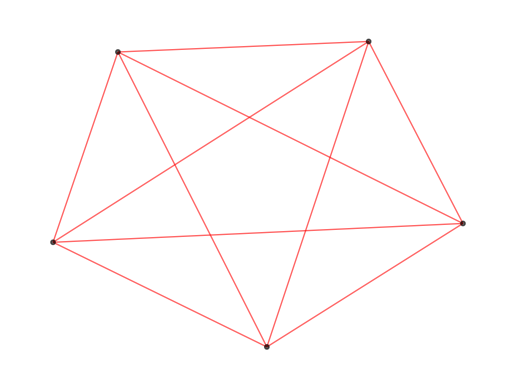

In [45]:
from networkx.algorithms import community
from networkx.algorithms import approximation

bbl = "1004120042"

subgraph = get_bbl_subgraph(wow_graph, bbl)

print(f"BBL: {bbl}")
print("Original Portfolio")
draw_graph(subgraph)

res = 0.9
communities = community.greedy_modularity_communities(subgraph, resolution=res)
print(f"Communities ({len(communities)}) (resolution={res})")
for comm in communities:
    comm_graph = nx.subgraph(subgraph, comm)
    score = approximation.average_clustering(comm_graph)
    print(f"approximation.average_clustering: {score}")
    draw_graph(comm_graph)

BBL: 1004120042
Original Portfolio


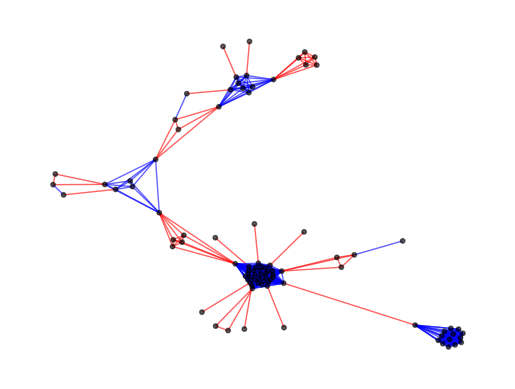

Communities (3) (resolution=0.1)
approximation.average_clustering: 1.0


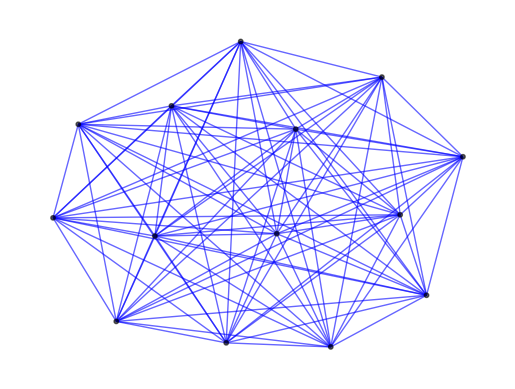

approximation.average_clustering: 0.813


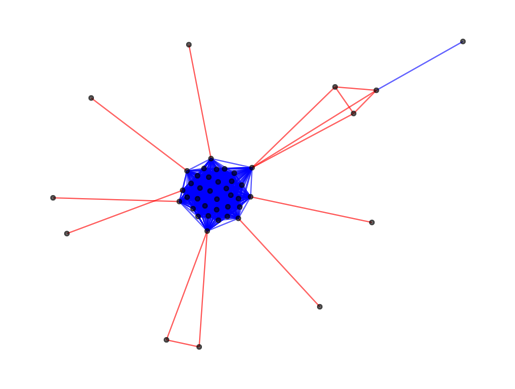

approximation.average_clustering: 0.748


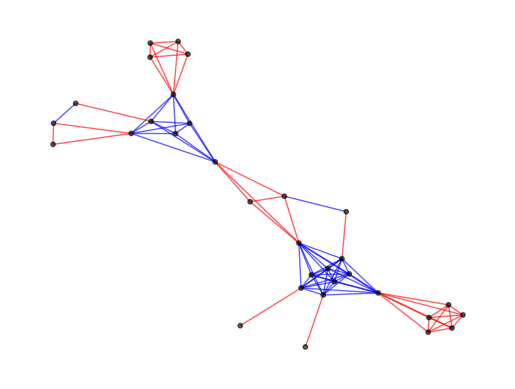

In [44]:
from networkx.algorithms import community
from networkx.algorithms import approximation

bbl = "1004120042"

subgraph = get_bbl_subgraph(wow_graph, bbl)

print(f"BBL: {bbl}")
print("Original Portfolio")
draw_graph(subgraph)

res = 0.1
communities = community.louvain_communities(subgraph, resolution=res)
print(f"Communities ({len(communities)}) (resolution={res})")
for comm in communities:    
    comm_graph = nx.subgraph(subgraph, comm)
    score = approximation.average_clustering(comm_graph)
    print(f"approximation.average_clustering: {score}")
    draw_graph(comm_graph)

This method uses [`kernighan_lin_bisection`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.kernighan_lin.kernighan_lin_bisection.html) to split a portfolio. At first on some examples this seems to do a nice job finding natural groupings, however it tries to split the graph into two sets of nodes with roughly the same number, so this won't work. You can see in the example below that there is a huge highly connected concentration, but it can't put those all in one partition and keep that size balance, so it just takes a subset from that cluster, actually breaking up what we might want to be extracting. 

In [ ]:
from networkx.algorithms import community

bbl = "1001420025"

subgraph = get_bbl_subgraph(wow_graph, bbl)

print(f"BBL: {bbl}")
print("Original Portfolio")
draw_graph(subgraph)

print("community.kernighan_lin_bisection")
splitgraph = community.kernighan_lin_bisection(subgraph, max_iter=1000)

draw_graph(nx.subgraph(subgraph, splitgraph[0]))
draw_graph(nx.subgraph(subgraph, splitgraph[1]))

In [55]:
from networkx.algorithms import community

BBL = "3013420039"
bbl_subgraph = get_bbl_subgraph(wow_graph, BBL)

def portfolio_subgraph_size(portfolio_subgraph):
    n_bbls = sum([len(node[1]["bbls"]) for node in portfolio_subgraph.nodes(data=True)])
    return n_bbls

def portfolio_is_too_big(portfolio_subgraph):
    MAX_SIZE = 300
    n_bbls = portfolio_subgraph_size(portfolio_subgraph)
    print(f"size: {n_bbls}")
    return n_bbls > MAX_SIZE

def split_subgraph_if(graph, subgraph, predicate):
    RESOLUTION = 0.1
    if predicate(subgraph):
        for comm in community.louvain_communities(
            subgraph, resolution=RESOLUTION
        ):
            comm_subgraph = graph.subgraph(comm)
            if portfolio_subgraph_size(subgraph) == portfolio_subgraph_size(comm_subgraph):
                yield comm_subgraph
            else:
                yield from split_subgraph_if(graph, comm_subgraph, predicate)
    else:
        yield subgraph

n = 0
for p in split_subgraph_if(wow_graph, bbl_subgraph, portfolio_is_too_big):
    n = n +1
    print(n)

size: 8651
size: 370
size: 252
1
size: 8
2
size: 110
3
size: 156
4
size: 410
size: 351
5
size: 12
6
size: 47
7
size: 215
8
size: 80
9
size: 371
size: 9
10
size: 362
11
size: 158
12
size: 77
13
size: 926
size: 268
14
size: 231
15
size: 143
16
size: 284
17
size: 193
18
size: 285
19
size: 371
size: 239
20
size: 132
21
size: 217
22
size: 670
size: 153
23
size: 171
24
size: 215
25
size: 131
26
size: 291
27
size: 471
size: 14
28
size: 12
29
size: 46
30
size: 109
31
size: 290
32
size: 215
33
size: 154
34
size: 225
35
size: 107
36
size: 247
37
size: 200
38
size: 380
size: 202
39
size: 178
40
size: 1862
size: 252
41
size: 31
42
size: 131
43
size: 55
44
size: 550
size: 261
45
size: 128
46
size: 129
47
size: 32
48
size: 301
size: 189
49
size: 112
50
size: 32
51
size: 337
size: 71
52
size: 86
53
size: 100
54
size: 80
55
size: 173
56


Building json for graph viz, including compound nodes

In [13]:
from collections import Counter
import importlib
import portfoliograph.graph
importlib.reload(portfoliograph.graph)


BBL = '1004120042'
graph = get_bbl_subgraph(wow_graph, BBL)

# nodes = [n for n in graph.nodes(data=True)]
# names = [n[1]["name"] for n in nodes]
# bizaddrs = [n[1]["bizAddr"] for n in nodes]
# print(nodes)
# compound_names = [x[0] for x in Counter(names).most_common() if x[1] > 5]
# compound_bizaddrs = [x[0] for x in Counter(bizaddrs).most_common() if x[1] > 5]

graph_json = portfoliograph.graph.to_json_graph(graph)
print(graph_json)

{'nodes': [{'id': 'PAUL MOORE', 'type': 'name'}, {'id': 'BENJAMIN ARYEH', 'type': 'name'}, {'id': '88 RIVINGTON STREET, MANHATTAN NY', 'type': 'bizAddr'}, {'id': '413 PARK AVENUE, BROOKLYN NY', 'type': 'bizAddr'}, {'id': '542 MAIN STREET 2FLOOR, N R NY', 'type': 'bizAddr'}, {'id': '311 BLVD OF THE AMERICAS SUITE, L NJ', 'type': 'bizAddr'}, {'id': 26629, 'type': 'owner', 'name': 'DAVID TEPLER', 'bizAddr': '413 PARK AVENUE, BROOKLYN NY', 'bbls': ['3018970026'], 'parent': '413 PARK AVENUE, BROOKLYN NY'}, {'id': 30218, 'type': 'owner', 'name': 'DOROTA APPLEBAUM', 'bizAddr': '88 RIVINGTON STREET, MANHATTAN NY', 'bbls': ['1004090003'], 'parent': '88 RIVINGTON STREET, MANHATTAN NY'}, {'id': 1569, 'type': 'owner', 'name': 'ADRIAN ALLY', 'bizAddr': '88 RIVINGTON STREET, MANHATTAN NY', 'bbls': ['1001490012'], 'parent': '88 RIVINGTON STREET, MANHATTAN NY'}, {'id': 89634, 'type': 'owner', 'name': 'PAUL MOORE', 'bizAddr': '494 EIGHT AVENUE 19FLOOR, MANHATTAN NY', 'bbls': ['2030100012'], 'parent': '

In [12]:
[1,2] + [2,3]

[1, 2, 2, 3]